# Exploration

In [1]:
__author__ = 'Ardalan'

FOLDER = "/home/ardalan/Documents/kaggle/avito/"

import os, sys, time, re, collections, operator, copy, itertools, zipfile, jellyfish
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", 99) # permet de voir toutes les colonnes

In [2]:
pdtrain_part1 = pd.read_hdf(FOLDER + "data/train_merged-part1.h")
pdtrain_part2 = pd.read_hdf(FOLDER + "data/train_merged-part2.h")
pdtrain = pdtrain_part1.append(pdtrain_part2)
pdtest = pd.read_hdf(FOLDER + "data/test_merged.h")

del pdtrain_part1
del pdtrain_part2

In [26]:
pdtrain.title_1.fillna("", inplace=True)
pdtrain.title_2.fillna("", inplace=True)

pdtrain.description_1.fillna("", inplace=True)
pdtrain.description_2.fillna("", inplace=True)

pdtrain.attrsJSON_1.fillna("", inplace=True)
pdtrain.attrsJSON_2.fillna("", inplace=True)

pdtest.title_1.fillna("", inplace=True)
pdtest.title_2.fillna("", inplace=True)

pdtest.description_1.fillna("", inplace=True)
pdtest.description_2.fillna("", inplace=True)

pdtest.attrsJSON_1.fillna("", inplace=True)
pdtest.attrsJSON_2.fillna("", inplace=True)

pdtrain.price_1.fillna(99999999, inplace=True)
pdtrain.price_2.fillna(99999999, inplace=True)


pdtest.price_1.fillna(99999999, inplace=True)
pdtest.price_2.fillna(99999999, inplace=True)

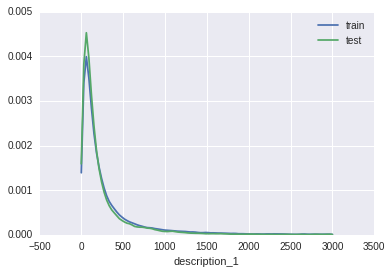

In [11]:
import matplotlib.pyplot as plt

plt.figure()
ax1 = sns.distplot(pdtrain.description_1.apply(len), hist=False, label='train')
ax2 = sns.distplot(pdtest.description_1.apply(len),  hist=False, label='test')
plt.legend()
plt.show()

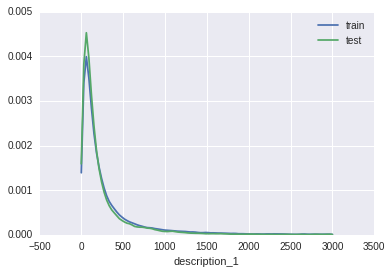

In [38]:
import matplotlib.pyplot as plt

plt.figure()
ax1 = sns.distplot(pdtrain.description_1.apply(len), hist=False, label='train')
ax2 = sns.distplot(pdtest.description_1.apply(len),  hist=False, label='test')
plt.legend()
plt.show()

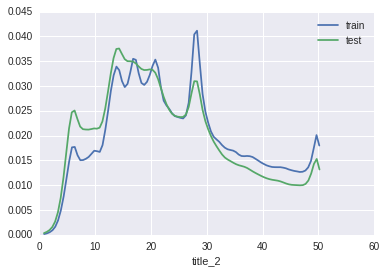

In [37]:
import matplotlib.pyplot as plt

plt.figure()
ax1 = sns.distplot(pdtrain.title_2.apply(len), hist=False, label='train')
ax2 = sns.distplot(pdtest.title_2.apply(len),  hist=False, label='test')
plt.legend()
plt.show()

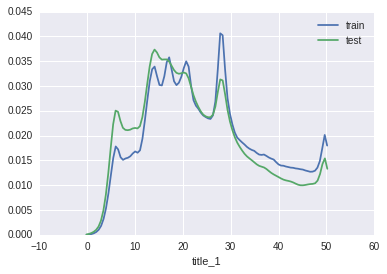

In [30]:
import matplotlib.pyplot as plt

plt.figure()
ax1 = sns.distplot(pdtrain.title_1.apply(len), hist=False, label='train')
ax2 = sns.distplot(pdtest.title_1.apply(len),  hist=False, label='test')
plt.legend()
plt.show()

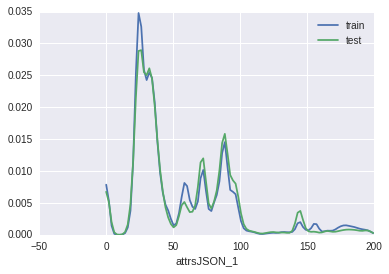

In [39]:
import matplotlib.pyplot as plt

len_train = pdtrain.attrsJSON_1.apply(len)
len_test = pdtest.attrsJSON_1.apply(len)

plt.figure()
ax1 = sns.distplot(len_train[len_train<200], hist=False, label='train')
ax2 = sns.distplot(len_test[len_test<200],  hist=False, label='test')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

len_train = pdtrain.attrsJSON_2.apply(len)
len_test = pdtest.attrsJSON_2.apply(len)

plt.figure()
ax1 = sns.distplot(len_train[len_train<200], hist=False, label='train')
ax2 = sns.distplot(len_test[len_test<200],  hist=False, label='test')
plt.legend()
plt.show()

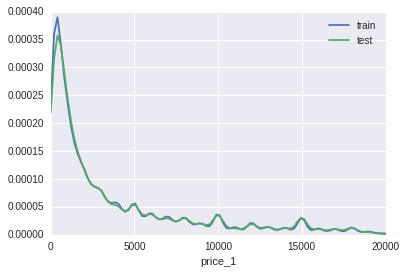

In [29]:

p1 = pdtrain.price_1
p2 = pdtest.price_1

plt.figure()
ax1 = sns.distplot(p1[p1<20000], hist=False, label='train')
ax2 = sns.distplot(p2[p2<20000],  hist=False, label='test')
plt.legend()
plt.show()

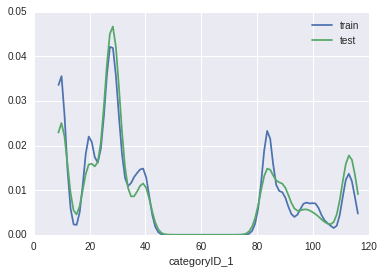

In [33]:

p1 = pdtrain.categoryID_1
p2 = pdtest.categoryID_1

plt.figure()
ax1 = sns.distplot(p1, hist=False, label='train')
ax2 = sns.distplot(p2,  hist=False, label='test')
plt.legend()
plt.show()

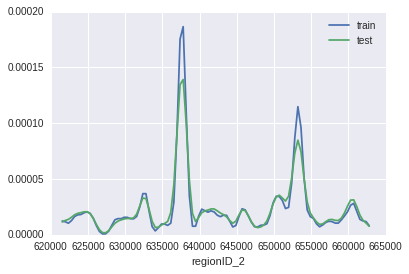

In [35]:

p1 = pdtrain.regionID_1
p2 = pdtest.regionID_2

plt.figure()
ax1 = sns.distplot(p1, hist=False, label='train')
ax2 = sns.distplot(p2,  hist=False, label='test')
plt.legend()
plt.show()

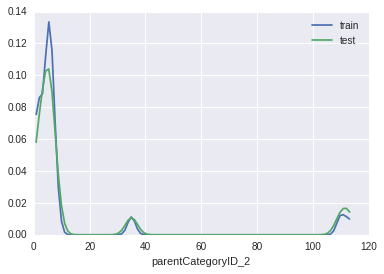

In [36]:

p1 = pdtrain.parentCategoryID_1
p2 = pdtest.parentCategoryID_2

plt.figure()
ax1 = sns.distplot(p1, hist=False, label='train')
ax2 = sns.distplot(p2,  hist=False, label='test')
plt.legend()
plt.show()

In [4]:
pdtrain['isDuplicate_cumsum'] = pdtrain['isDuplicate'].cumsum()

In [12]:
pdtrain['attrsJSON_1_len'] = pdtrain.attrsJSON_1.apply(len)
pdtrain['attrsJSON_2_len'] = pdtrain.attrsJSON_2.apply(len)

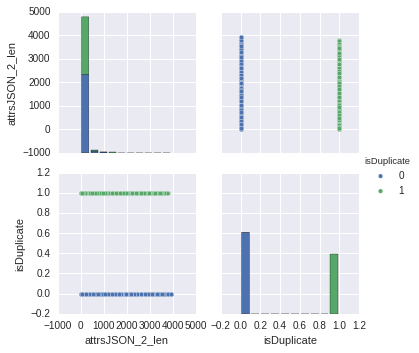

In [16]:
ax = sns.pairplot(pdtrain[['attrsJSON_2_len','isDuplicate']],hue='isDuplicate')

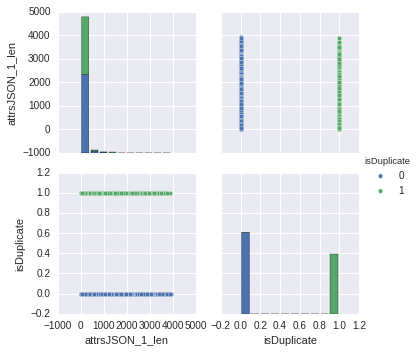

In [15]:
ax = sns.pairplot(pdtrain[['attrsJSON_1_len','isDuplicate']],hue='isDuplicate')

In [ ]:
data.groupby(data.index).agg({
            "TripType": lambda x: x.head(1),
            "Weekday": lambda x: x.head(1),

In [39]:
half = int(len(pdtrain) / 2)
print(pdtrain.iloc[:half]['isDuplicate'].sum())
print(pdtrain.iloc[half:]['isDuplicate'].sum())

629937
634342


In [65]:
duplicates_per_cat1 = pdtrain.groupby(['categoryID_1']).agg({'isDuplicate': lambda x: np.sum(x)}).to_dict()
cat1_dic_count = pdtrain.categoryID_1.value_counts().to_dict()

for key in duplicates_per_cat1['isDuplicate']:
    duplicates_per_cat1['isDuplicate'][key] /= cat1_dic_count[key]

In [66]:
pd.DataFrame(duplicates_per_cat1).sort_values(by='isDuplicate', ascending=False)

,isDuplicate
85,0.827381
23,0.804150
25,0.747123
24,0.741046
26,0.740904
42,0.644682
81,0.621303
90,0.613771
112,0.588827
82,0.563966


In [17]:
pdtrain[['itemID_1', 'itemID_2']]

,itemID_1,itemID_2
0,1,4112648
1,3,1991275
2,4,1223296
3,7,1058851
4,8,2161930
5,9,694103
6,12,5637025
7,12,5279740
8,15,113701
9,16,2467698


In [16]:
pdtrain.columns

Index(['isDuplicate', 'generationMethod', 'itemID_1', 'categoryID_1',
       'title_1', 'description_1', 'images_array_1', 'attrsJSON_1', 'price_1',
       'locationID_1', 'metroID_1', 'lat_1', 'lon_1', 'parentCategoryID_1',
       'regionID_1', 'itemID_2', 'categoryID_2', 'title_2', 'description_2',
       'images_array_2', 'attrsJSON_2', 'price_2', 'locationID_2', 'metroID_2',
       'lat_2', 'lon_2', 'parentCategoryID_2', 'regionID_2'],
      dtype='object')